# 자치구 별 교육 기관 데이터

In [305]:
import pandas as pd
import mysql.connector

## 어린이집

In [306]:
daycare_center = pd.read_csv('/home/lee/dev_ws/projects/project01/data/어린이집.csv', encoding='euc-kr')
daycare_center.head()

daycare_center = daycare_center.iloc[0:25]
daycare_center = daycare_center[['자치구명', '시설수합계']]
daycare_center.rename(columns={'자치구명':'자치구',
                                        '시설수합계':'계'}, inplace=True)

In [307]:
daycare_center.reset_index()

daycare_center['타입'] = '어린이집'

for idx, gu in enumerate(daycare_center['자치구']):
    daycare_center['자치구'][idx] = gu + '구'

/tmp/ipykernel_15519/3355591776.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  daycare_center['자치구'][idx] = gu + '구'
/tmp/ipykernel_15519/3355591776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### 결과 daycare_center

In [308]:
daycare_center.head()

,자치구,계,타입
0,서대문구,126,어린이집
1,송파구,296,어린이집
2,강남구,174,어린이집
3,서초구,157,어린이집
4,관악구,158,어린이집


## 유치원

In [309]:
preschool = pd.read_csv('/home/lee/dev_ws/projects/project01/data/유치원.csv', header=2,encoding='utf-8')

preschool = preschool[['자치구별(2)','소계']]
preschool.rename(columns={'자치구별(2)':'자치구', '소계':'계'}, inplace=True)
preschool = preschool[preschool['자치구']!='소계']

In [310]:
preschool = preschool.set_index('자치구')
preschool = preschool.reset_index()
preschool['타입'] = '유치원'

### 결과 preschool

In [311]:
preschool.head()

,자치구,계,타입
0,종로구,16,유치원
1,중구,13,유치원
2,용산구,13,유치원
3,성동구,28,유치원
4,광진구,24,유치원


## 초등학교

In [312]:
elementary = pd.read_csv('/home/lee/dev_ws/projects/project01/data/초등학교.csv',header=3, encoding='utf-8')
elementary = elementary[['자치구별(2)','소계']]
elementary.rename(columns={'자치구별(2)':'자치구', '소계':'계'}, inplace=True)
elementary = elementary[elementary['자치구']!='소계']

elementary = elementary.set_index('자치구')
elementary = elementary.reset_index()
elementary['타입'] = '초등학교'

### 결과 elementary

In [313]:
elementary['타입'] = '초등학교'

## 중학교

In [314]:
middle = pd.read_csv('/home/lee/dev_ws/projects/project01/data/중학교_390.csv', encoding='euc-kr')

middle = middle[['도로명주소', '학교명', '설립구분']]
middle['자치구'] = [gu.split(' ')[1] for gu in middle['도로명주소']]

middle = pd.pivot_table(
    data=middle,
    columns='자치구',
    values='학교명',
    aggfunc='count'
).T.reset_index()

middle.rename(columns={'학교명':'계'},inplace=True)

middle['타입'] = '중학교'

### 결과 middle

In [315]:


middle.head()

,자치구,계,타입
0,강남구,24,중학교
1,강동구,19,중학교
2,강북구,13,중학교
3,강서구,22,중학교
4,관악구,16,중학교


## 고등학교 

In [316]:
high = pd.read_csv('/home/lee/dev_ws/projects/project01/data/고등학교_318.csv', encoding='euc-kr')

high = high[['도로명주소', '학교명', '설립구분']]
high['자치구'] = [gu.split(' ')[1] for gu in high['도로명주소']]
high = pd.pivot_table(
    data=high,
    columns='자치구',
    values='학교명',
    aggfunc='count'
).T.reset_index()

high.rename(columns={'학교명':'계'},inplace=True)

high = high.set_index('자치구')
high = high.sort_values('계')
high['타입'] = '고등학교'
high = high.reset_index()

### 결과 high

In [317]:
high.head()

,자치구,계,타입
0,금천구,6,고등학교
1,강북구,7,고등학교
2,서대문구,7,고등학교
3,동작구,7,고등학교
4,성동구,7,고등학교


## 대학교 

In [318]:
university = pd.read_excel('/home/lee/dev_ws/projects/project01/data/대학교.xlsx',header=1)

university = university[university['시도']=='서울']
university = university[['행정구', '학교수']]
university = university.drop(26)
university.rename(columns={'행정구':'자치구','학교수':'계'},inplace=True)

/home/lee/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### 결과 university

In [319]:
university.head()

,자치구,계
1,종로구,8.0
2,중구,3.0
3,용산구,3.0
4,성동구,3.0
5,광진구,4.0


## 학원과 독서실

In [320]:
academy_studyspace = pd.read_csv('/home/lee/dev_ws/projects/project01/data/학원_독서실.csv',encoding='utf-8')
academy_studyspace = academy_studyspace[['자치구별(2)','2023.1','2023.2','2023.4','2023.6','2023.20']]

academy_studyspace.rename(columns={
    '자치구별(2)':'자치구',
    '2023.1':'계',
    '2023.2':'입시학원계',
    '2023.4':'예체능학원계',
    '2023.6':'입시컨설팅계',
    '2023.20':'독서실계'
},inplace=True)

academy_studyspace = academy_studyspace.drop([0,1,2,3,4])

academy_studyspace = academy_studyspace.set_index('자치구')
academy_studyspace = academy_studyspace.reset_index()

### 학원 데이터

#### 결과 test_prep_acad

In [321]:
# 입시학원
test_prep_acad = academy_studyspace[['자치구', '입시학원계']]

test_prep_acad = test_prep_acad.set_index('자치구')
test_prep_acad['입시학원계'] = test_prep_acad['입시학원계'].astype(int)
test_prep_acad = test_prep_acad.sort_values('입시학원계')

test_prep_acad.rename(columns={'입시학원계':'계'},inplace=True)

test_prep_acad['타입'] = '입시학원'


#### 예체능학원 결과 art_sport_acad

In [322]:
# 에체능학원
art_sport_acad = academy_studyspace[['자치구', '예체능학원계']]

art_sport_acad = art_sport_acad.set_index('자치구')
art_sport_acad['예체능학원계'] = art_sport_acad['예체능학원계'].astype(int)
art_sport_acad = art_sport_acad.sort_values('예체능학원계')

art_sport_acad['타입'] = '예체능학원'

art_sport_acad.rename(columns={'예체능학원계':'계'},inplace=True)

### 독서실

#### 결과 study_space

In [323]:
study_space = academy_studyspace[['자치구', '독서실계']]

study_space = study_space.set_index('자치구')
study_space['독서실계'] = study_space['독서실계'].astype(int)
study_space = study_space.sort_values('독서실계')

study_space['타입'] = '독서실'

## 도서관

In [324]:
library = pd.read_csv('/home/lee/dev_ws/projects/project01/data/도서관.csv',header=2,encoding='utf-8')

library = library.drop('자치구별(1)',axis=1)
library = library.drop([0,26])

library.rename(columns={
    '자치구별(2)':'자치구',
    '소계':'계'
},inplace=True)

library = library.set_index('자치구')
library = library.reset_index()
library = library[['자치구','계']]

library = library.set_index('자치구')
library['계'] = library['계'].astype(int)
library = library.sort_values('계')

library['타입'] = '도서관'

#### 결과 library

## 진학율&취업

In [325]:
admit_employ = pd.read_csv('/home/lee/dev_ws/projects/project01/data/진학률.csv',header=1,encoding='utf-8')

admit_employ.rename(columns={
    '자치구별(2)':'자치구',
    '고등학교별(2)':'학교별',
    '졸업자 (명)':'졸업자',
    '진학자수 (명)':'진학자',
    '진학률 (%)':'진학률',
    '취업자 (명)':'취업자'
},inplace=True)

admit_employ = admit_employ[['자치구','학교별','졸업자','진학자','진학률','취업자']]

admit_employ = admit_employ[admit_employ['자치구']!='소계']

admit_employ = admit_employ.set_index('자치구')
admit_employ = admit_employ.reset_index()

### 진학률 결과 admit_rate

In [326]:
# 자치구별 진학률
admit_rate = admit_employ[['자치구','진학률','학교별','진학자']]
admit_rate = admit_rate[admit_rate['학교별']=='소계']
admit_rate = admit_rate.set_index('자치구')
admit_rate = admit_rate.reset_index()
admit_rate = admit_rate.drop('학교별', axis=1)

admit_rate = admit_rate.set_index('자치구')
admit_rate = admit_rate.sort_values('진학률')

### 취업률 결과 employ_rate

In [ ]:
# 자치구별 취업률
employ_rate = admit_employ[['자치구','졸업자','취업자','학교별']]
employ_rate = employ_rate[employ_rate['학교별']=='소계']
employ_rate = employ_rate.set_index('자치구')
employ_rate = employ_rate.reset_index()
employ_rate = employ_rate.drop('학교별', axis=1)

tmp = []

for i in range(len(employ_rate)):
    tmp.append(round((int(employ_rate['취업자'][i])/int(employ_rate['졸업자'][i])*100),1))

employ_rate['취업률'] = tmp
employ_rate = employ_rate[['자치구','취업률','취업자']]

employ_rate = employ_rate.set_index('자치구')
employ_rate = employ_rate.sort_values('취업률')

ValueError: Length of values (7) does not match length of index (25)

## 등록인구

In [384]:
local_people = pd.read_csv('/home/lee/dev_ws/projects/project01/data/등록인구.csv', encoding='utf-8')
local_people.head()

,동별(1),항목,2024 3/4,2024 3/4.1,2024 3/4.2,2024 3/4.3,2024 3/4.4,2024 3/4.5,2024 3/4.6,2024 3/4.7,...,2024 4/4.12,2024 4/4.13,2024 4/4.14,2024 4/4.15,2024 4/4.16,2024 4/4.17,2024 4/4.18,2024 4/4.19,2024 4/4.20,2024 4/4.21
0,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,계,9605419,208596,291269,357817,380655,584967,823767,818905,...,730403,705495,640195,439509,337947,235361,120587,40193,9577,1526
2,합계,한국인,9350995,204196,285344,353284,371958,539933,783553,793613,...,710310,692690,633549,436781,336990,234945,120305,40067,9527,1484
3,합계,등록외국인,254424,4400,5925,4533,8697,45034,40214,25292,...,20093,12805,6646,2728,957,416,282,126,50,42
4,종로구,계,150011,2477,3561,4675,5556,12261,14696,12135,...,11884,11548,9874,6532,5421,4351,2509,889,223,41


In [385]:
tmp = ['동별(1)','항목']
for i in range(7):
    if i==0:
        tmp.append('2024 4/4')
    else:
        tmp.append(f'2024 4/4.{i}')

local_people = local_people[tmp]

In [386]:
for idx,col in enumerate(local_people.columns):
    local_people.rename(columns={f'{local_people.columns[idx]}':f'{local_people[col][0]}'},inplace=True)

local_people.head()

,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세
0,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세
1,합계,계,9597372,207542,286741,356567,381258,581606,818212
2,합계,한국인,9331828,202897,280883,352036,368731,530569,777691
3,합계,등록외국인,265544,4645,5858,4531,12527,51037,40521
4,종로구,계,149608,2449,3497,4644,5595,12174,14573


In [387]:
local_people.drop(0)

,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세
1,합계,계,9597372,207542,286741,356567,381258,581606,818212
2,합계,한국인,9331828,202897,280883,352036,368731,530569,777691
3,합계,등록외국인,265544,4645,5858,4531,12527,51037,40521
4,종로구,계,149608,2449,3497,4644,5595,12174,14573
5,종로구,한국인,138336,2254,3257,4420,4958,8639,12324
...,...,...,...,...,...,...,...,...,...
74,송파구,한국인,650110,16611,24529,29110,27740,32018,49024
75,송파구,등록외국인,6200,131,150,96,155,399,679
76,강동구,계,481474,13241,18042,21051,19995,22933,34247
77,강동구,한국인,476942,13137,17932,20943,19891,22583,33645


In [396]:
local_people = local_people[local_people['항목']=='한국인']

In [400]:
local_people.drop(2).set_index('동별(1)').reset_index()

,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세
0,종로구,한국인,138336,2254,3257,4420,4958,8639,12324
1,중구,한국인,120544,2562,2754,2803,3080,6346,10431
2,용산구,한국인,203854,4732,5518,6154,6762,10635,17140
3,성동구,한국인,273669,7563,8411,8237,9094,16106,22847
4,광진구,한국인,331963,5835,8263,10915,12071,21759,35128
5,동대문구,한국인,338735,7493,9681,10679,11591,25034,30509
6,중랑구,한국인,379274,7965,9828,11259,12009,18237,29309
7,성북구,한국인,421560,9246,13249,16128,17845,30939,32560
8,강북구,한국인,283597,4189,6365,8573,9832,15996,20206
9,도봉구,한국인,303228,5191,7776,10248,11349,15635,20017


## 모든 데이터 합치기

In [329]:
# school

school = pd.concat([daycare_center,preschool,elementary, middle, high], ignore_index=False)

school = school.sort_values('자치구').reset_index().drop('index',axis=1)

In [401]:
school.head()

,자치구,계,타입
0,강남구,22,고등학교
1,강남구,174,어린이집
2,강남구,37,유치원
3,강남구,34,초등학교
4,강남구,24,중학교


### DB에 데이터 넣기

In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'team2',
    password = "1234",
    database = 'eda_project' 
)

cursor = conn.cursor(buffered=True)

# insert문
sql = 'insert into school ()values (%s,%s)'

# 데이터 입력
for i, row in df.iterrows():
    cursor.execute(sql, tuple(row))
    print(tuple(row))
    conn.commit()

In [330]:
# academy

academy = pd.concat([test_prep_acad, art_sport_acad],ignore_index=False)

In [331]:
# learning_space

learning_space = pd.concat([test_prep_acad, art_sport_acad],ignore_index=False)

learning_space = learning_space.sort_values(['자치구']).reset_index()

## 시각화

In [333]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

<Axes: ylabel='자치구'>

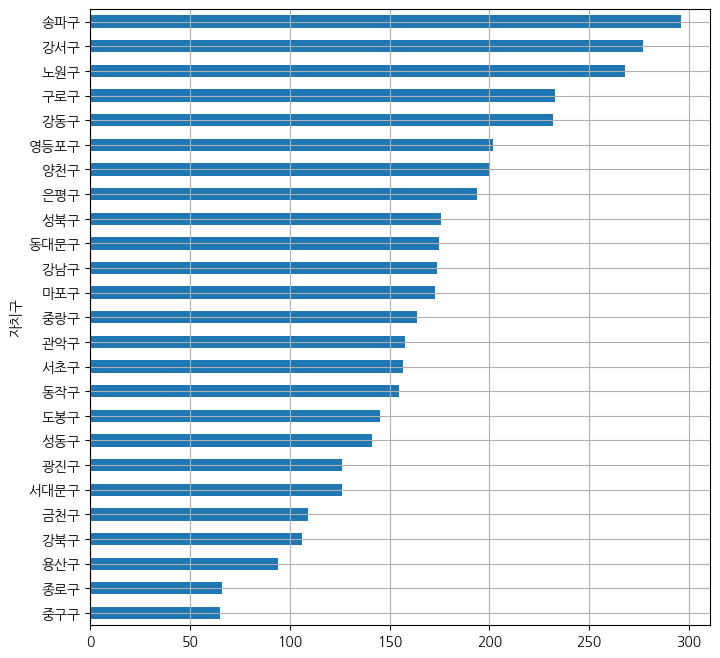

In [336]:
daycare_center_sort = daycare_center.sort_values('계').set_index('자치구')
daycare_center_sort['계'].plot(kind='barh', grid=True, figsize=(8,8))

<Axes: >

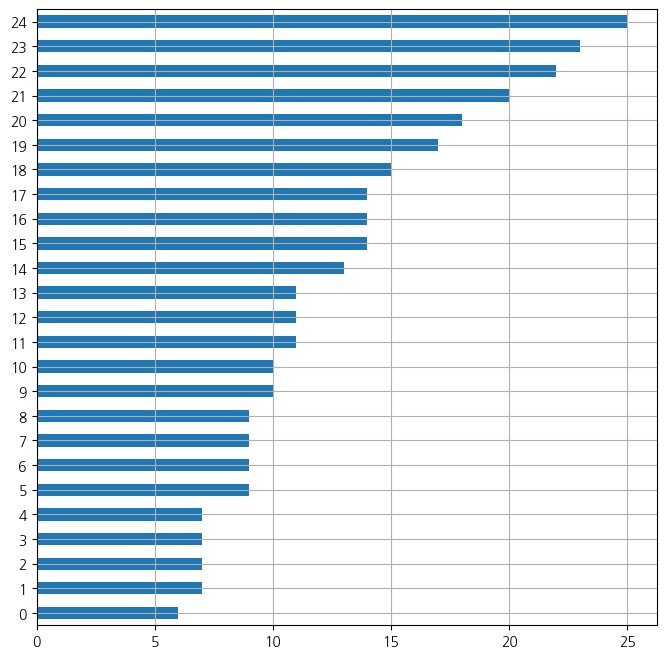

In [ ]:
high['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **노원구, 강서구, 강남구, 송파구, 은평구 순으로 고등학교 수가 많다**

In [ ]:
test_prep_acad['입시학원계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구, 양천구, 송파구, 서초구, 노원구 순으로 입시 학원 수가 많다**

In [ ]:
art_sport_acad['예체능학원계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구 송파구 마포구 강서구 강동구 순으로 예체능 학원 수가 많다**

In [ ]:
study_space['독서실계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구 송파구 서초구 양펀구 강서구 순으로 독서실 수가 많다**

In [ ]:
library['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **서초구 종로구 중구 강남구 성북수 순으로 도서관 수가 많다**

In [ ]:
admit_rate['진학률'].plot(kind='barh', grid=True, figsize=(8,8))

* **진학률은 동대문구 금천구 서대문구 강동구 구로구 순으로 많지만 크게 차이가 나지는 않늗다**

In [ ]:
employ_rate['취업률'].plot(kind='barh', grid=True, figsize=(8,8))

* **진학을 하지 않고 바로 취업한 사람들은 중구 금천구 관악구 성북구 용산구 순으로 많다**

In [ ]:
high_sort = high.sort_values('자치구').set_index('자치구')
admit_rate_sort = admit_rate.sort_values('자치구')

In [ ]:
high_sort.head()

In [ ]:
admit_rate_sort.head()

In [ ]:
high_and_admit = pd.concat((high_sort, admit_rate_sort), axis=1)
high_and_admit.head()

In [ ]:
import seaborn as sns

high_and_admit = high_and_admit.sort_values('계')

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='계',data=high_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='진학률',data=high_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)


* **각 행정구역별 고등학교 수와 진학률을 비교해봤을 때 상관이 없어 보인다**

In [ ]:
acad_sort = academy_studyspace[['자치구', '계']].sort_values('자치구').set_index('자치구')
acad_num = 0
for i in acad_sort['계']:
    acad_num+=int(i)

print(acad_num)
tmp = []

for num in acad_sort['계']:
    tmp.append(round((int(num)/acad_num*100),1))

acad_sort['비율'] = tmp
acad_sort.head()

In [ ]:
admit_rate_sort.head()

In [ ]:
acad_and_admit = pd.concat((acad_sort, admit_rate_sort), axis=1)
acad_and_admit

In [ ]:
acad_and_admit = acad_and_admit.sort_values('진학률',ascending=False)

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='진학률',data=acad_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='비율',data=acad_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)